In [1]:
!pip install wordcloud
!pip install gensim

In [2]:
import os.path

MODEL = 'bert-base-cased'
# MODEL = 'nli-envoy'
# MODEL = 'sts-biobert-base-cased-v1.1'
# MODEL = 'all-mpnet-base-v2' 
# MODEL = 'sts-bert-base-cased3'
# MODEL = 'NLI'
# MODEL = 'fagner/envoy'

# DATASET = 'OSCE_questao1'
# DATASET = 'OSCE_questao2'
DATASET = 'OSCE/dor_toracica_x_infarto'
# DATASET = 'OSCE'
# DATASET = 'OSCE(by-oracao)'
# DATASET = 'control_test'

# TSV_PATH = '../from_embeddings_to_tsv/output2/' + DATASET + '/' + MODEL + '/'
# TSV_PATH = '../from_embeddings_to_tsv/output3/' + DATASET + '/' + MODEL + '/'
# TSV_PATH = '../from_embeddings_to_tsv/output2/' + DATASET + '/' + MODEL + '/'
TSV_PATH = '../from_embeddings_to_tsv/output_from_2/' + DATASET + '/' + MODEL + '/'
# TSV_PATH = '../sentence_embedding/tsv_files/' + DATASET + '/' + MODEL + '/'
# TSV_PATH = '../sentence_embedding/output/' + DATASET + '/' + MODEL + '/'

TEXTS_FILE = '../datasets/' + DATASET + '/respostas_ingles.txt'
with open(TEXTS_FILE) as f:
    data_samples = f.readlines()

IMG_PATH = 'imgs/'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

IMG_PATH +=  DATASET + '/'

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)
    
IMG_PATH += MODEL + '/'
print(IMG_PATH)

# os.makedirs(path, exist_ok=True)
if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH, exist_ok=True)

if not os.path.exists(TSV_PATH):
    os.makedirs(TSV_PATH, exist_ok=True)
#     os.mkdir(TSV_PATH)

imgs/OSCE/dor_toracica_x_infarto/bert-base-cased/


In [3]:
import pandas as pd

embeddings_df = pd.read_csv(TSV_PATH + 'word_embeddings.tsv', sep='\t',header=None)
sentences_df = pd.read_csv(TSV_PATH + 'labels.tsv', sep='\t',header=None)

# embeddings_df = pd.read_csv('../sentence_embedding/tsv_files/stsb-roberta-large/exame-OSCE/cefaleia/word_embeddings.tsv', sep='\t',header=None)
# sentences_df = pd.read_csv('../sentence_embedding/tsv_files/paraphrase-distilroberta-base-v1/exame-OSCE/cefaleia/labels.tsv', sep='\t',header=None)

print(sentences_df)

embeddings_numpy = embeddings_df.to_numpy()
sentences_numpy = sentences_df.to_numpy()

X_embeddings = embeddings_numpy[:, :-1]

provas = []
for i in range(len(X_embeddings)):
    provas.append(i)
# embeddings_df

                                                    0
0   0 - Acute myocardial infarction is usually man...
1   1 - It is when the cardiac muscle suffers isch...
2   2 - Acute infarction can have an ECG represent...
3   3 - There are different types of infarctions, ...
4   4 - Typical presentation: acute thoracic, more...
..                                                ...
76  76 - AMI is the result of rupture of the ather...
77  77 - AMI is an ischemic disease that affects t...
78  78 - There are infarcts with ST elevation and ...
79  79 - It can be with ST elevation or without ST...
80  80 - CV risk factors: DM, AHT, Obesity, Smokin...

[81 rows x 1 columns]


In [4]:
## Criando objetos necessários para rodar gemsim.CoherenceModel

In [5]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w{3,}')

tokenized_sentences = []
for idx in range(len(data_samples)):
    tokenized_sentences.append(tokenizer.tokenize(data_samples[idx]))  # Split the sentence into words.
    
# Remove numbers, but not words that contain numbers.
tokenized_sentences = [[token for token in doc if not token.isnumeric()] for doc in tokenized_sentences]

# Remove words that are only one character.
# sentences = [[token for token in doc if len(token) > 1] for doc in sentences]

dictionary = Dictionary(tokenized_sentences)
corpus = [dictionary.doc2bow(text) for text in tokenized_sentences]
texts = [[dictionary[word_id] for word_id, freq in doc] for doc in corpus]

In [6]:
print(provas)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [7]:
# sentences_numpy

In [8]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

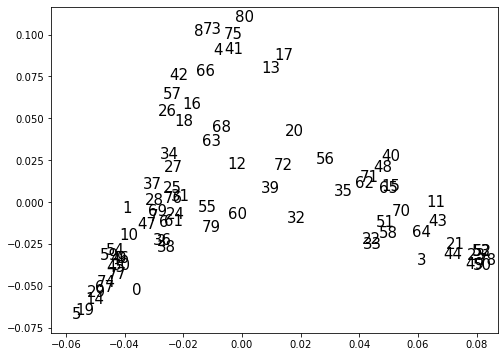

In [9]:
from matplotlib import pyplot as plt 
from sklearn import manifold

X_2d = manifold.SpectralEmbedding(n_components=2).fit_transform(X_embeddings)

x = X_2d[:,0]
y = X_2d[:,1]
plt.figure(figsize=(8, 6))

# fig, ax = plt.subplots()
# plt.scatter(x, y)

plt.scatter(x, y, color='white', s=30)

for i, txt in enumerate(provas):
    plt.annotate(txt, (x[i], y[i]), fontsize=15)
    
plt.savefig(IMG_PATH + 'sentence-embeddings')


10
9
8
7
6
5
4


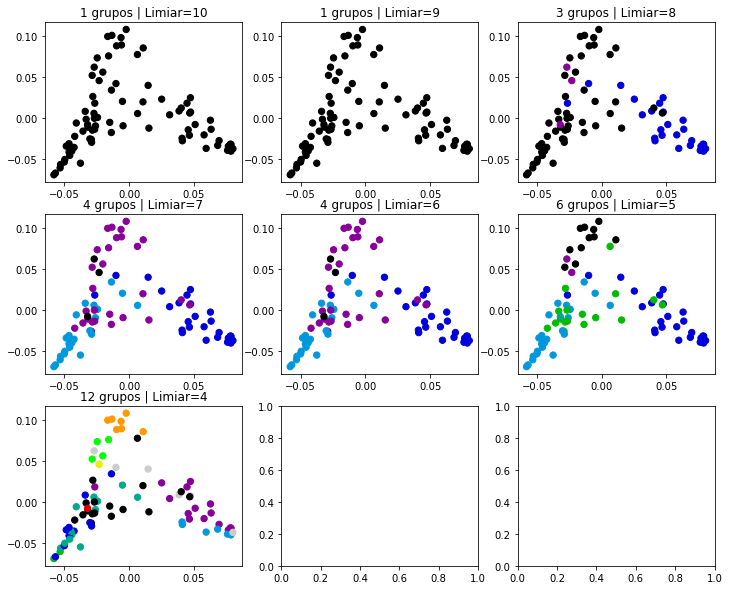

In [10]:
from sklearn.cluster import AgglomerativeClustering

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

set_of_colors = []
n_clusters = []
distance_thresholds = []
clusterers = []

# distance_thresholds = [20, 15, 14, 13, 10, 9, 8]
# distance_thresholds = [40, 30, 25, 15, 13, 9, 8]
distance_thresholds = [10, 9, 8, 7, 6, 5, 4]
# distance_thresholds = [3e-4,10e-5, 9e-5, 8e-5, 7e-5, 6e-5, 5e-5]
# distance_thresholds = [7, 8, 9, 10, 16, 20, 25]
# distance_thresholds = [1, 1.2, 1.3, 1.4, 1.7, 1.9, 2]
# distance_thresholds = [5, 6, 7, 8, 9, 10, 11]
# distance_thresholds = [5, 10, 15, 20, 22, 24, 25]
# distance_thresholds = [16, 17, 18, 19, 20, 21, 22]
# distance_thresholds = [0.00025, 0.00017, 0.00013, 0.00009, 0.00007, 0.00006, 0.00005]
# distance_thresholds = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
# distance_thresholds = [7, 13, 18, 22, 28, 37, 43]
# distance_thresholds = [5, 6, 7, 9, 10, 15, 20, ]

for i in distance_thresholds:
    print(i)
#     distance_thresholds.append(11+i)
    clusterer = AgglomerativeClustering(linkage='ward', distance_threshold=i, n_clusters=None)

    clusterer = clusterer.fit(X_embeddings)
    
    clusterers.append(clusterer)
    
    n_clusters.append(clusterer.n_clusters_)
    colors = []
    for l in clusterer.labels_:
        colors.append(plt.cm.nipy_spectral(l / 10.))
    set_of_colors.append(colors)
    
ax[0][0].scatter(x, y, color=set_of_colors[0], s=40, cmap='hsv_r')
ax[0][0].title.set_text(str(n_clusters[0]) + ' grupos | Limiar=' + str(distance_thresholds[0]))

ax[0][1].scatter(x, y, color=set_of_colors[1], s=40, cmap='hsv_r')
ax[0][1].title.set_text(str(n_clusters[1]) + ' grupos | Limiar=' + str(distance_thresholds[1]))

ax[0][2].scatter(x, y, color=set_of_colors[2], s=40, cmap='hsv_r')
ax[0][2].title.set_text(str(n_clusters[2]) + ' grupos | Limiar=' + str(distance_thresholds[2]))

ax[1][0].scatter(x, y, color=set_of_colors[3], s=40, cmap='hsv_r')
ax[1][0].title.set_text(str(n_clusters[3]) + ' grupos | Limiar=' + str(distance_thresholds[3]))

ax[1][1].scatter(x, y, color=set_of_colors[4], s=40, cmap='hsv_r')
ax[1][1].title.set_text(str(n_clusters[4]) + ' grupos | Limiar=' + str(distance_thresholds[4]))

ax[1][2].scatter(x, y, color=set_of_colors[5], s=40, cmap='hsv_r')
ax[1][2].title.set_text(str(n_clusters[5]) + ' grupos | Limiar=' + str(distance_thresholds[5]))

ax[2][0].scatter(x, y, color=set_of_colors[6], s=40, cmap='hsv_r')
ax[2][0].title.set_text(str(n_clusters[6]) + ' grupos | Limiar=' + str(distance_thresholds[6]))

# for i, txt in enumerate(provas):
#     ax[2][0].annotate(txt, (x[i], y[i]))


# ax[2][0].text(x, y, 'te'
# #                  color=set_of_colors[6]
# #                  fontdict={'weight': 'bold', 'size': 9}
#              )

plt.savefig(IMG_PATH + 'clusters')
# plt.show()


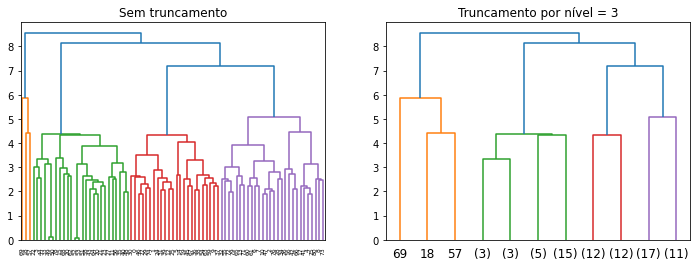

In [11]:
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Sem aplicar truncamento no dendograma
ax[0].title.set_text('Sem truncamento')
plot_dendrogram(clusterers[0], truncate_mode=None, ax=ax[0])

# Truncando por nível
# Não mais do que p níveis da árvore do dendrograma são exibidos. Um “nível” inclui todos os nós com mesclagens p da última mesclagem. 
# ax[0][1].title.set_text('Truncamento por nível = '+ str(12))
# plot_dendrogram(models[1], truncate_mode='level', p=12, ax=ax[0][1])

# ax[0][2].title.set_text('Truncamento por nível = '+ str(7))
# plot_dendrogram(models[2], truncate_mode='level', p=7, ax=ax[0][2])

# ax[1][0].title.set_text('Truncamento por nível = '+ str(5))
# plot_dendrogram(models[3], truncate_mode='level', p=5, ax=ax[1][0])
# ax[1][1].title.set_text('Truncamento por nível = '+ str(4))
# plot_dendrogram(models[4], truncate_mode='level', p=4, ax=ax[1][1])
ax[1].title.set_text('Truncamento por nível = '+ str(3))
plot_dendrogram(clusterers[5], truncate_mode='level', p=3, ax=ax[1])
# ax[2][0].title.set_text('Truncamento por nível = '+ str(1))
# plot_dendrogram(models[6], truncate_mode='level', p=1, ax=ax[2][0])


# Os últimos p clusters não únicos, formados na rede são os únicos nós não folha na rede; eles correspondem às linhas Z [n-p-2: fim] em Z. Todos os outros clusters não singleton são contraídos em nós folha. 
# ax[2][1].title.set_text('Truncamento por número de clusters = '+ str(113))
# plot_dendrogram(models[6], truncate_mode='lastp', p=113, ax=ax[2][1])
# ax[2][2].title.set_text('Truncamento por número de clusters = '+ str(2))
# plot_dendrogram(models[6], truncate_mode='lastp', p=2, ax=ax[2][2])

plt.savefig(IMG_PATH + 'dendrogramas')
# plot_dendrogram(models[2], truncate_mode='lastp', p=6, ax=ax[0][2])


In [12]:

def plot_top_words(top_words_by_cluster, highest_weights_by_cluster, title):
    fig, axes = plt.subplots(1, len(top_words_by_cluster), figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for i in range(len(top_words_by_cluster)):
#         print(i)

#     for topic_idx, topic in enumerate(model.components_):
#         top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
#         top_features = [feature_names[i] for i in top_features_ind]
#         weights = topic[top_features_ind]
        
#         top_words

        ax = axes[i]
        ax.barh(top_words_by_cluster[i], highest_weights_by_cluster[i], height=0.7)
        ax.set_title(f"Tópico/Cluster {i +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# plot_top_words('dsd', 'juju')


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


----------------------


AttributeError: 'AxesSubplot' object has no attribute 'flatten'

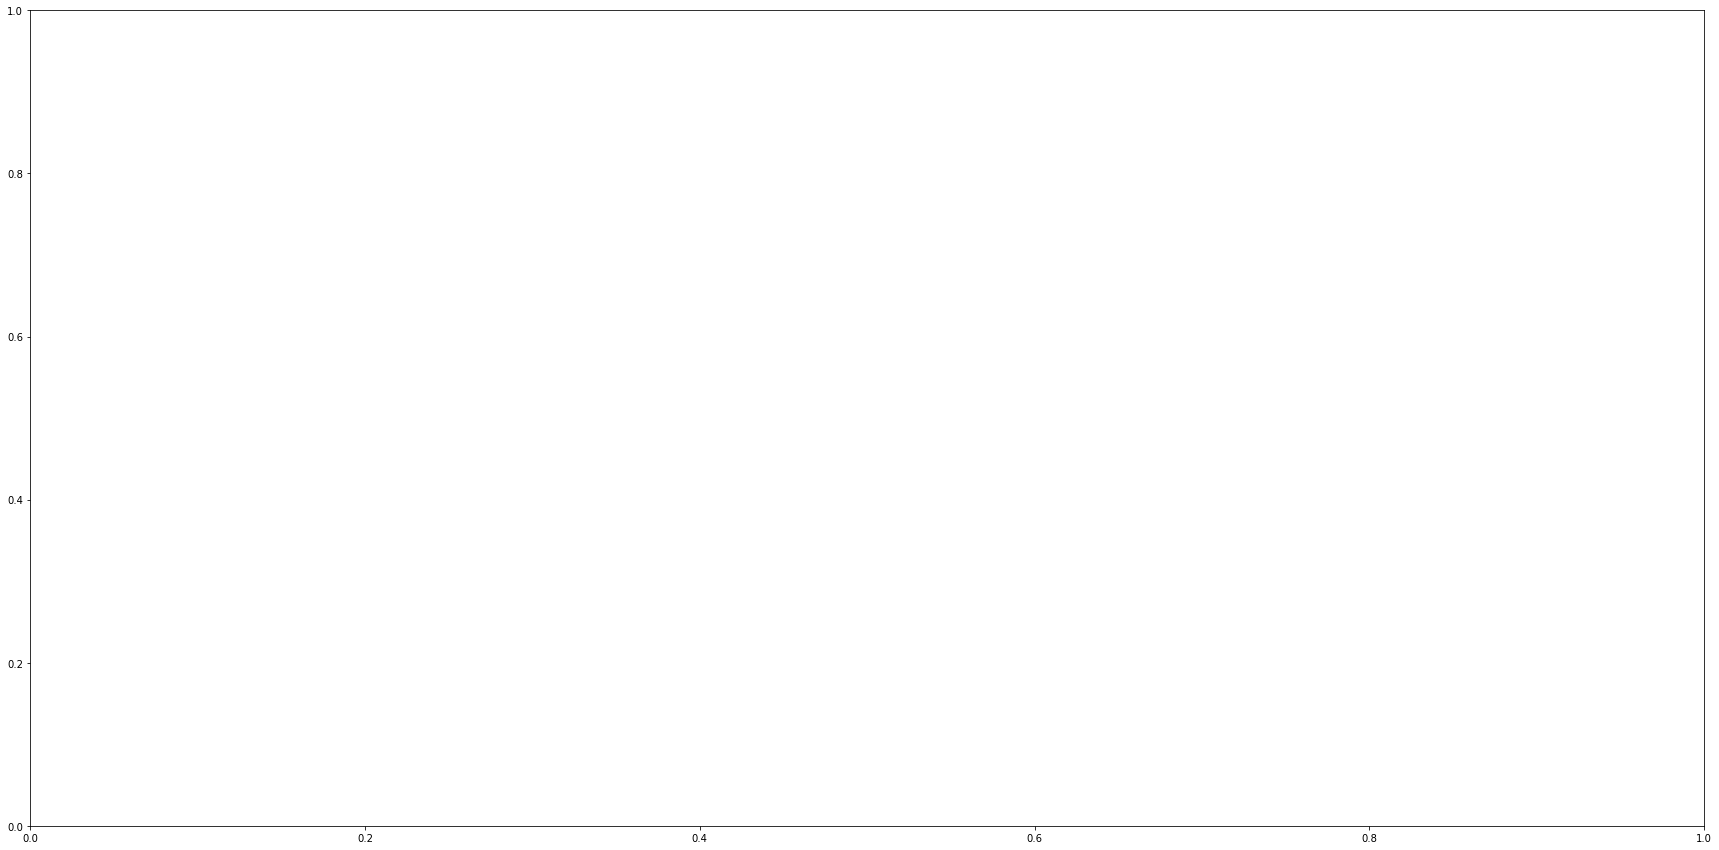

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 

tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
# tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.1)

# print(n_clusters)
# print()

k = 0


# itera por cada resultado de uma clusterização
for n in n_clusters:
    
#     print('n clusters: ',n)

    sentences_by_cluster = [''] * n
    sentences_by_cluster_formato_tfidf = []

    for i in range(len(clusterers[k].labels_)):
        sentence = ''
        sentence = sentences_numpy[i] + ' | '
        sentences_by_cluster[clusterers[k].labels_[i]] += sentence
    
    for cluster_as_a_document in sentences_by_cluster:
        sentences_by_cluster_formato_tfidf.append(str(cluster_as_a_document).split('[')[1].replace('[', '').replace(']\n', '').replace('\'', ''))

    tfidf_matrix = tf_idf_vectorizer.fit_transform(sentences_by_cluster_formato_tfidf)
    tfidf = tfidf_matrix.toarray()

    terms = tf_idf_vectorizer.get_feature_names()

#     print(tfidf_matrix)
    i=0
    topics_by_cluster = []
    wordclouds = []
    
#     topics_by_cluster = []
    highest_tfidfs_by_cluster = []

    for cluster in sentences_by_cluster_formato_tfidf:
        topics = []
        highest_tfidfs = []
        
#         print('Cluster: ', i)
#         print(sentences_by_cluster[i])
        tfidf_ordenado = np.argsort(tfidf[i]) 
        highests = tfidf_ordenado[-10:]
        
#         print(tfidf_ordenado)
#         print(tfidf[i].shape)
        

        dense = tfidf_matrix[i].todense()
        lst1 = dense.tolist()
        tfidf_data_frame = pd.DataFrame(lst1, columns=terms)

#         print('Topics (ascending order):')

        for h in highests:
#             print(terms[h])
            topics.append(terms[h])
#             print('kkkkkkkkkkkkkkkkkkk',h)
#             print(dense[0][0])
            highest_tfidfs.append(tfidf[i][h])
#         print(highest_weights)
        topics_by_cluster.append(topics)
        highest_tfidfs_by_cluster.append(highest_tfidfs)

#         topics_by_cluster.append(topics)
        
        
#         df = tfidf_data_frame.T.sum(axis=1)
#         print(np.argsort(lst1))
        
        wordcloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tfidf_data_frame.T.sum(axis=1))
        wordclouds.append(wordcloud)

        i+=1
    print('----------------------')

    plot_top_words(topics_by_cluster, highest_tfidfs_by_cluster, 'Tópicos')

    fig, axs = plt.subplots(n, figsize=(10, 20))
        
    j=0

    for wc in wordclouds:
        axs[j].title.set_text('Cluster '+str(j))
        axs[j].imshow(wc)
        axs[j].axis("off")
        j+=1
        
    print(topics_by_cluster)

    cm = CoherenceModel(topics=topics_by_cluster, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
    print(cm.get_coherence())
    print(cm.get_coherence_per_topic())
    
    plt.savefig(IMG_PATH + 'topicos_por_'+str(n)+'_clusters')
    print(clusterers[k])
    k+=1


In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w{3,}')

tokenized_sentences = []
for idx in range(len(data_samples)):
    tokenized_sentences.append(tokenizer.tokenize(data_samples[idx]))  # Split into words.
    
# Remove numbers, but not words that contain numbers.
tokenized_sentences = [[token for token in doc if not token.isnumeric()] for doc in tokenized_sentences]

# Remove words that are only one character.
# sentences = [[token for token in doc if len(token) > 1] for doc in sentences]

dictionary = Dictionary(tokenized_sentences)
corpus = [dictionary.doc2bow(text) for text in tokenized_sentences]
texts = [[dictionary[word_id] for word_id, freq in doc] for doc in corpus]

topics = [
    ['acute', 'ecg', 'markers', 'usually', 'radiate', 'ami', 'myocardial', 'elevation', 'st', 'pain'], 
    ['case', 'markers', 'acute', 'changes', 'elevation', 'myocardial', 'ami', 'ecg', 'supra', 'st'], 
    ['artery', 'st', 'acute', 'necrosis', 'pain', 'elevation', 'obstruction', 'coronary', 'type', 'myocardial'],
    ['diseases', 'myocardial', 'urgent', 'intervention', '18', '57', 'requiring', 'obst', 'ischemia', 'tissue'],
    ['smoking', 'factors', 'shoulders', 'radiate', 'risk', 'st', 'elevation', 'retrosternal', 'age', 'pain'],
    ['results', 'muscle', 'attack', 'needs', 'supply', 'miss', 'bloodstream', 'match', '69', 'heart'],
    ['patient', 'markers', 'cardiac', 'perform', 'st', 'anticoagulant', 'aspiring', 'catheterization', 'ecg', 'pain']

]
# Initialize CoherenceModel using `topics` parameter
cm = CoherenceModel(topics=topics, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
print(cm.get_coherence())
print(cm.get_coherence_per_topic())
# print(model.print_topics())


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def plot_clustering(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(8, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(provas[i])+'.', color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold'})
        plt.scatter(X[i, 0], X[i, 1], color=plt.cm.nipy_spectral(labels[i] / 10.), s=40, cmap='hsv_r')

# Define os valores nos eixos
    plt.xticks([0,1.1])
    plt.yticks([0,1.1])
    plt.title(title, size=17)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig(title)

In [ ]:
def plot_clustering_v2(X, labels, title=None):
    X_2d
    clustered_x = []
    clustered_y = []
    for x in X:
        clustered_x.append(x[0])
        clustered_y.append(x[1])
    
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(len(clustered_x)):
        plt.text(clustered_x[i], clustered_y[i], provas[i], color=plt.cm.nipy_spectral(labels[i] / 10.),
                         fontdict={'weight': 'bold'})

    plt.scatter(clustered_x, clustered_y, color=plt.cm.nipy_spectral(agglomerative.labels_ / 10.), s=40, cmap='hsv_r')
    plt.xticks([])
    plt.yticks([])

    plt.colorbar()